In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import catboost as cb

In [2]:
df = pd.read_csv("TFTP_mini.csv")

In [3]:
df.head(10)

,Flow ID,SourceIP,Destination IP,Destination Posrt,Flow Duration,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Label
0,0,0,0,0,0,0,0,0,0,0,0
1,35872,0,0,0,2,0,0,0,0,0,0
2,24,0,0,2,2,0,0,0,0,0,0
3,6442,0,0,2,2,0,0,0,0,0,0
4,57,0,0,7,2,0,0,0,0,0,0
5,13930,0,0,8,2,0,0,0,0,0,0
6,26938,0,0,9,2,0,0,0,0,0,0
7,8956,0,0,12,2,0,0,0,0,0,0
8,94,0,0,13,2,0,0,0,0,0,0
9,130,0,0,17,2,0,0,0,0,0,0


<AxesSubplot:>

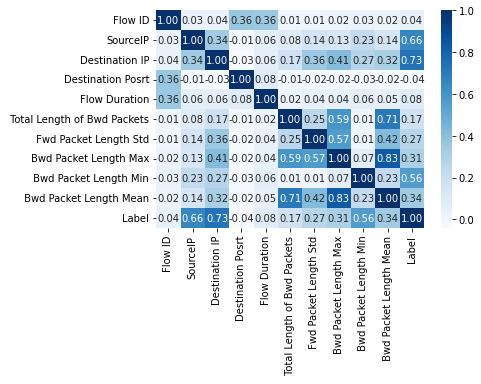

In [4]:
plt.rcParams['figure.figsize'] = (30,10)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Blues')

In [5]:
X = df.drop('Label',axis=1)
X.head(5)

,Flow ID,SourceIP,Destination IP,Destination Posrt,Flow Duration,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean
0,0,0,0,0,0,0,0,0,0,0
1,35872,0,0,0,2,0,0,0,0,0
2,24,0,0,2,2,0,0,0,0,0
3,6442,0,0,2,2,0,0,0,0,0
4,57,0,0,7,2,0,0,0,0,0


In [6]:
y = df['Label']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [7]:
X.shape

(201079, 10)

In [8]:
y.shape

(201079,)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

In [10]:
X_test.shape

(40216, 10)

In [11]:
X_train.shape

(160863, 10)

In [12]:
knn_1 = KNeighborsClassifier(n_neighbors=5)

In [13]:
scale = StandardScaler()

In [14]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [15]:
X_train_scaled

array([[-0.26402334, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       [ 1.41854068, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       [-1.65808942, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       ...,
       [ 1.26076342, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       [-1.17679568, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       [ 1.70876487, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166]])

In [16]:
X_test_scaled

array([[ 1.37858202, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       [ 1.35456548, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       [ 1.2372512 , -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       ...,
       [ 1.10822842, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       [ 0.60070709, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       [-0.52752367, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687]])

In [17]:
knn_v = knn_1.fit(X_train_scaled,y_train)

In [18]:
y_pred = knn_1.predict(X_test_scaled)

In [19]:
y_test

180170    0
178806    0
172080    0
141177    0
81976     0
         ..
185615    0
73874     0
164661    0
135365    0
69885     0
Name: Label, Length: 40216, dtype: int64

In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
val = accuracy_score(y_test,y_pred)*100
val = round(val,4)
val

99.9925

In [22]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[40170,     2],
       [    1,    43]], dtype=int64)

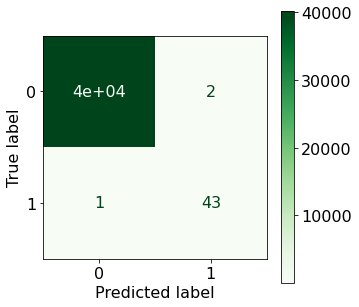

In [23]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_1.classes_,)
disp.plot(cmap='Greens')

In [24]:
knn_1.score(X_test_scaled,y_test)

0.9999254028247464

In [25]:
knn_1.score(X_train_scaled,y_train)

0.9999689176504231

In [26]:
#Mean Abs Error
print(f"Mean Abs Error = {mean_absolute_error(y_test,y_pred)}")
#Mean Sq Error
print(f"Mean Sq Error = {mean_squared_error(y_test,y_pred)}")
#Mean Sq Error
print(f"Root Mean Sq Error = {np.sqrt(mean_squared_error(y_test,y_pred))}")

Mean Abs Error = 7.459717525363039e-05
Mean Sq Error = 7.459717525363039e-05
Root Mean Sq Error = 0.008636965627674478


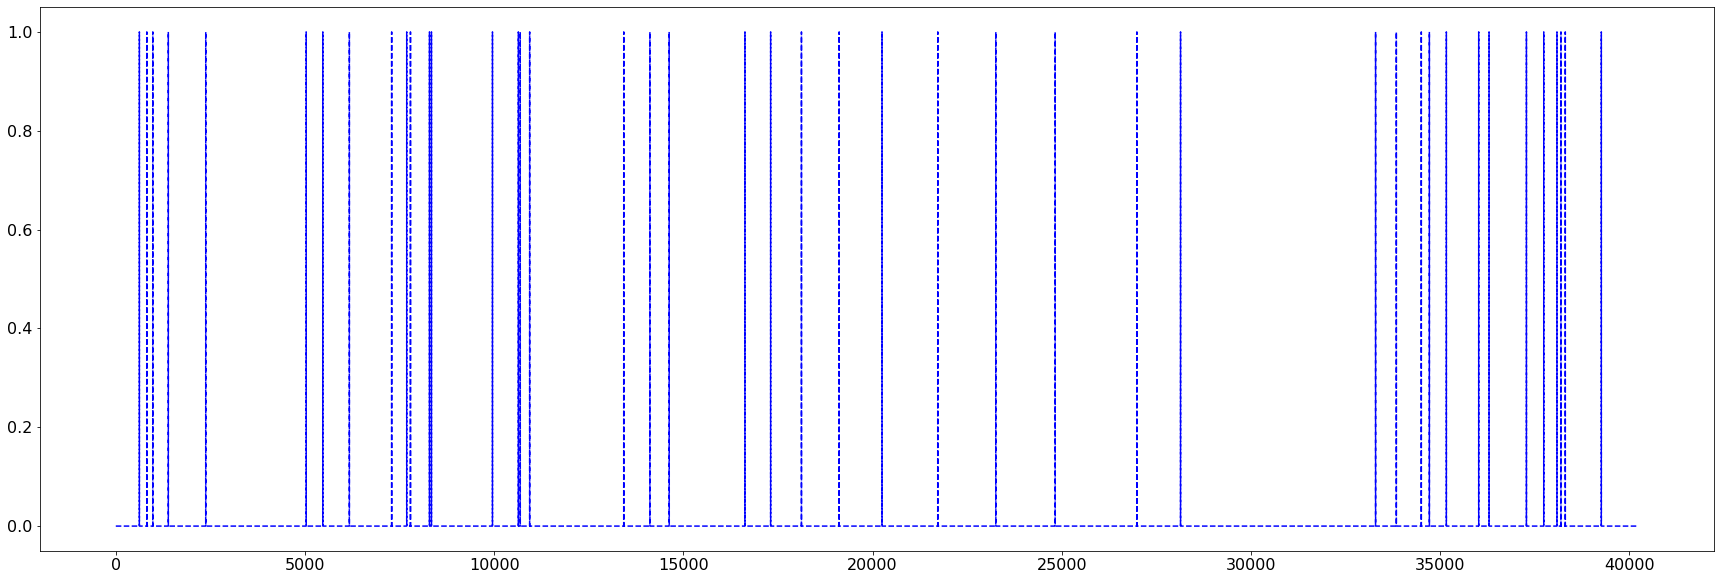

In [27]:
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'blue', linestyle = '--')

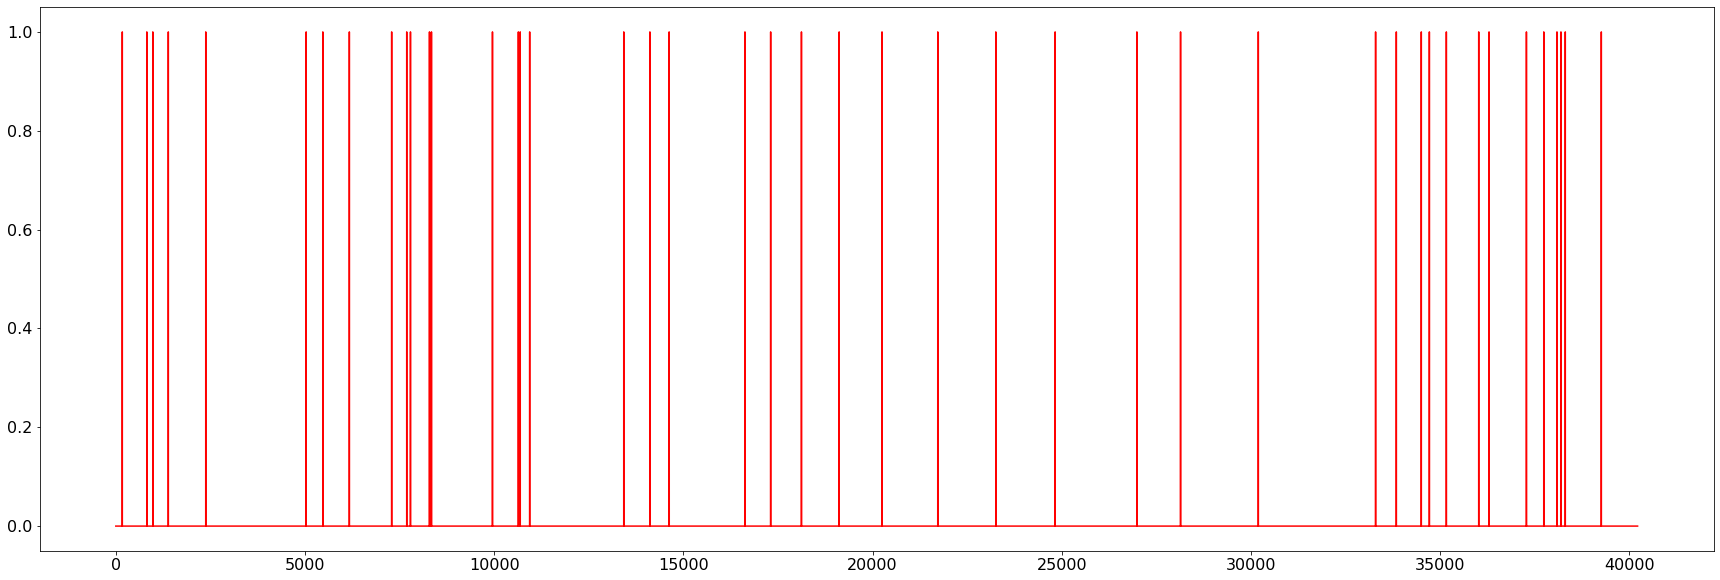

In [28]:
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
plt.plot(x_ax, y_pred, label = 'Predicted', color = 'red', linestyle = '-')

In [29]:
knn_2 = KNeighborsClassifier(n_neighbors=5)

In [30]:
scores = cross_val_score(knn_2, X, y,cv = 10, scoring = 'accuracy')

In [31]:
scores = [ 100* round(elem, 4) for elem in scores ]
print(scores)

[99.87, 99.67, 99.88, 98.7, 99.97, 99.0, 99.96000000000001, 99.11, 99.36, 52.059999999999995]


In [32]:
est_score = np.array(scores).mean()
print(est_score)

94.758


In [33]:
k_range = range(1, 30) #KNN (k) values
k_scores = []

for k in k_range:
    knn_3 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_3, X, y,cv = 5, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [35]:
k_scores = [ 100* round(elem, 4) for elem in k_scores ]
print(k_scores)

[8208.0, 8664.0, 8638.0, 8791.0, 8786.0, 8920.0, 8915.0, 9001.0, 8997.0, 9050.0, 9047.0, 9112.0, 9109.0, 9160.0, 9160.0, 9191.0, 9190.0, 9213.0, 9213.0, 9241.0, 9241.0, 9260.0, 9259.0, 9273.0, 9272.0, 9290.0, 9289.0, 9301.0, 9300.0]


<AxesSubplot:>

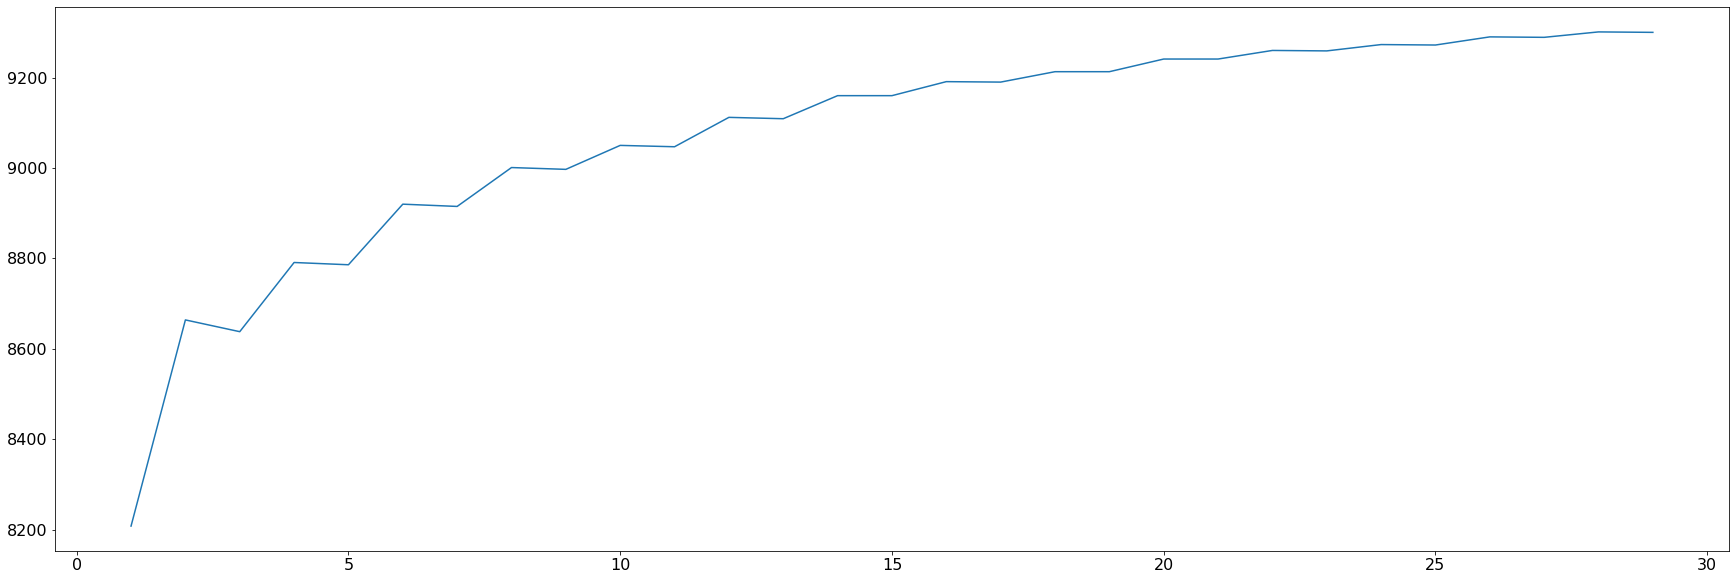

In [36]:
sns.lineplot(x=k_range,y=k_scores)

In [ ]:
k_range = range(1, 30) #KNN (k) values
k_err_scores = []

for k in k_range:
    knn_4 = KNeighborsClassifier(n_neighbors=k)
    knn_4.fit(X_train_scaled,y_train)
    y_pred = knn_4.predict(X_test_scaled)
    k_err_scores.append(mean_squared_error(y_test,y_pred))

In [ ]:
sns.lineplot(x=k_range,y=k_err_scores)

In [ ]:
train_dataset = cb.Pool(X_train_scaled, y_train) 
test_dataset = cb.Pool(X_test_scaled, y_test)
model = cb.CatBoostRegressor(loss_function='RMSE')

In [ ]:
train_data = Pool(data=X_train_scaled,
                  label=y_train)
#Creating pool object for test dataset
test_data = Pool(data=X_test_scaled,
                  label=y_test)